In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def plot_cont(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    ax.plot(x, np.exp(self.logp(x)).eval())
    return ax

# Assign this distribution to the abstract class Continuous
pm.Continuous.plot = plot_cont

In [3]:
with pm.Model() as model:
    log_ror = pm.LogNormal("log_ror", mu=np.log(796), sigma=8/800)
    log_ror2 = pm.LogNormal("log_ror2", mu=np.log(10), sigma=1/10)
    log_ror3 = pm.LogNormal("log_ror3", mu=np.log(796), sigma=0.1)
    ror3 = pm.Normal("ror3", mu=796.0, sigma=796/100)
    #ror = pm.Deterministic("ror", pm.math.exp(log_ror))

In [4]:
with model:
    trace = pm.sample(
        tune=500, #2500,
        draws=500, #2000,
        cores=1, #4
        chains=1, #4
        return_inferencedata=True,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [log_ror, log_ror2, log_ror3, ror3]


Output()

Sampling 1 chain for 500 tune and 500 draw iterations (500 + 500 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([<Axes: title={'center': 'log_ror'}>,
       <Axes: title={'center': 'log_ror2'}>,
       <Axes: title={'center': 'log_ror3'}>,
       <Axes: title={'center': 'ror3'}>], dtype=object)

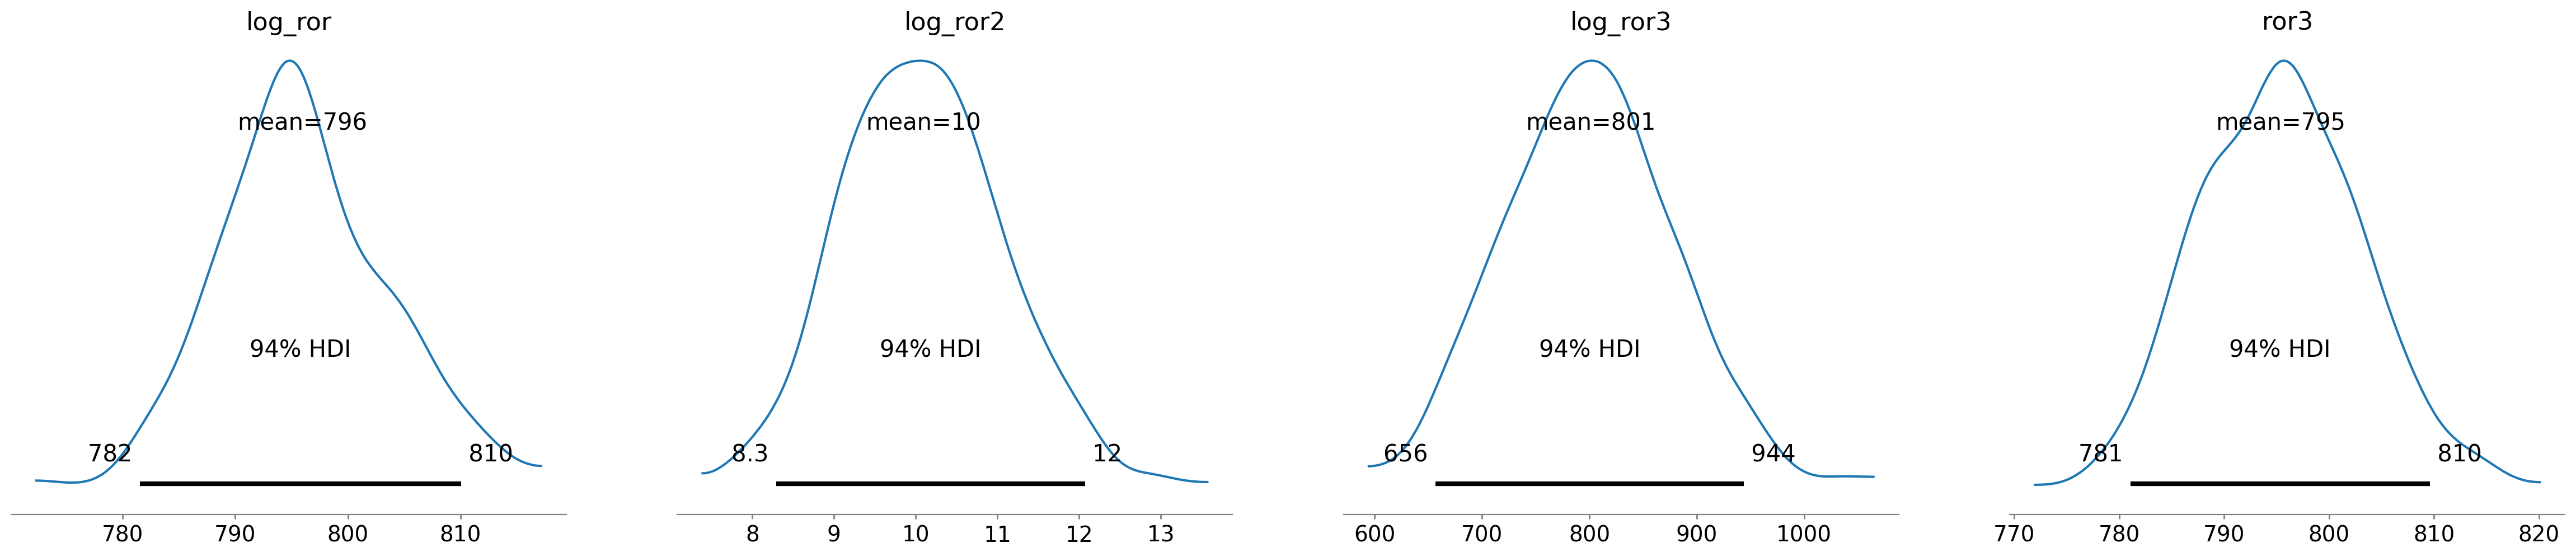

In [5]:
az.plot_posterior(trace, var_names=['log_ror', 'log_ror2', 'log_ror3', 'ror3'])